(42000, 785)
(42000, 784)
(42000,)
(33600, 784)


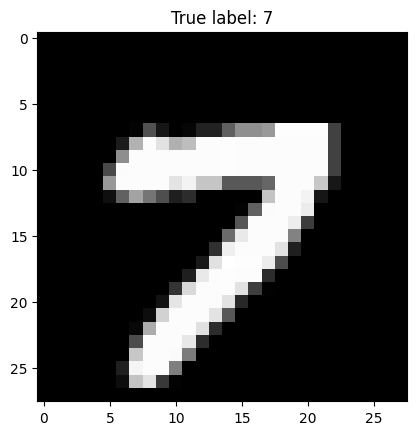

Predicted label: 7
Accuracy: 0.84


In [1]:
#Decision Tree with Default Parameter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('train.csv')

# Print the shape of the data
print(data.shape)

# Features and labels
X = data.iloc[:, 1:].values  # Pixel values
Y = data.iloc[:, 0].values   # Digit labels

# Print the shape of X and Y
print(X.shape)
print(Y.shape)

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)
print(X_train.shape)

# Initializing and training the Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

# Select a specific test sample
sample_index = 101
plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
plt.title(f"True label: {Y_test[sample_index]}")
plt.show()

# Predict the digit for the selected test sample
predicted_label = classifier.predict(X_test[sample_index].reshape(1, -1))

# Print the predicted digit
print(f"Predicted label: {predicted_label[0]}")
# Make predictions on the test set
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.2f}")

In [2]:
# Apply Random Search Optimization to find Best parameters

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
train_data = pd.read_csv('train.csv')

# Split the data into features and labels
X = train_data.drop(columns=['label'])  # Features (pixel values)
y = train_data['label']  # Labels (the digits)

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Set up the hyperparameter grid for Random Search
param_distributions = {
    'criterion': ['gini', 'entropy'],     # Splitting criteria
    'max_depth': [10, 20, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt_classifier,
                                   param_distributions=param_distributions,
                                   n_iter=10,            # Number of parameter settings sampled
                                   cv=5,                 # 5-fold cross-validation
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)            # Use all available cores

# Perform Random Search on the training data
random_search.fit(X_train, y_train)

# Get the best parameters and print them
best_params = random_search.best_params_
print("Best Parameters found: ", best_params)

# Use the best estimator to predict on the test data
y_pred = random_search.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Random Search Optimization: {accuracy * 100:.2f}%")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters found:  {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'criterion': 'entropy'}
Accuracy with Random Search Optimization: 86.52%


In [3]:
#Applying Best parameter on overall dataset

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
train_data = pd.read_csv('train.csv')

# Split the data into features and labels
X = train_data.drop(columns=['label'])  # Features (pixel values)
y = train_data['label']  # Labels (the digits)

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the best parameters found from Random Search
best_params = {
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': None,
    'max_depth': None,
    'criterion': 'entropy'
}

# Initialize the Decision Tree Classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    criterion=best_params['criterion']
)

# Train the classifier on the complete training set
best_dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Parameters on Full Dataset: {accuracy * 100:.2f}%")


Accuracy with Best Parameters on Full Dataset: 86.76%


X shape: (42000, 784)
Y shape: (42000,)
Training set shape: (33600, 784)
Testing set shape: (8400, 784)


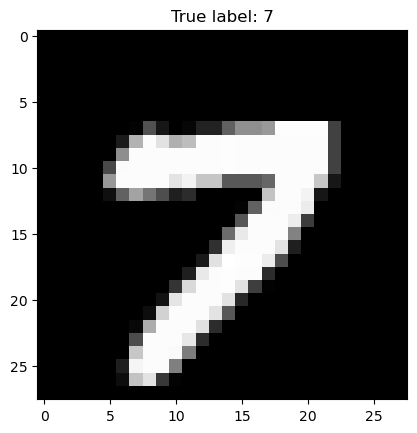

Predicted label: 7
Accuracy: 0.94


In [5]:
# Random Forest With Default Parameters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer  # For handling missing values

# Load dataset
data = pd.read_csv('train.csv')

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data.iloc[:, 1:])  # Pixel values (handling NaNs)
Y = data.iloc[:, 0].values  # Digit labels

# Print the shape of X and Y
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Initializing and training the Random Forest Classifier with specified parameters
rf_classifier = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=10,           # Maximum depth of the tree
    min_samples_split=2,    # Minimum number of samples required to split an internal node
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
    random_state=42         # Random state for reproducibility
)
rf_classifier.fit(X_train, Y_train)

# Select a specific test sample
sample_index = 101

# Reshape the selected test sample and display it as an image
plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
plt.title(f"True label: {Y_test[sample_index]}")
plt.show()

# Predict the digit for the selected test sample
predicted_label = rf_classifier.predict(X_test[sample_index].reshape(1, -1))

# Print the predicted digit
print(f"Predicted label: {predicted_label[0]}")

# Make predictions on the entire test set
Y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

In [6]:
# Apply random search optimization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Load dataset
data = pd.read_csv('train.csv')

# Use a subset of the data for faster training (e.g., 20% of the data)
data_subset = data.sample(frac=0.2, random_state=42)  # Change frac to adjust the subset size

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data_subset.iloc[:, 1:])  # Pixel values (handling NaNs)
Y = data_subset.iloc[:, 0].values  # Digit labels

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

# Define the hyperparameter space for the Random Forest classifier
param_space = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Set up the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_space,
    n_iter=20,  # Number of parameter settings to sample
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Run the random search optimization
random_search.fit(X_train, Y_train)

# Get the best hyperparameters found
best_params = random_search.best_params_
print("Best hyperparameters found using RandomizedSearchCV:")
print(best_params)

# Evaluate the model with the best hyperparameters on the test set
best_rf = random_search.best_estimator_
Y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f"Accuracy with the best hyperparameters: {accuracy:.2f}")

Best hyperparameters found using RandomizedSearchCV:
{'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 363}
Accuracy with the best hyperparameters: 0.95


X shape: (42000, 784)
Y shape: (42000,)
Training set shape: (33600, 784)
Testing set shape: (8400, 784)


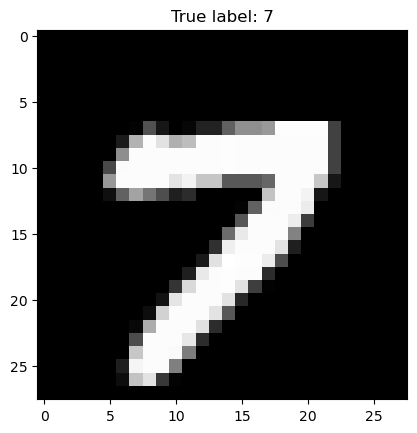

Predicted label: 7
Accuracy: 0.96


In [7]:
# Apply best parameters on full dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer  # For handling missing values

# Load dataset
data = pd.read_csv('train.csv')

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data.iloc[:, 1:])  # Pixel values (handling NaNs)
Y = data.iloc[:, 0].values  # Digit labels

# Print the shape of X and Y
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Initializing and training the Random Forest Classifier with specified parameters
rf_classifier = RandomForestClassifier(
    n_estimators=363,       # Number of trees in the forest
    max_depth=30,           # Maximum depth of the tree
    min_samples_split=5,    # Minimum number of samples required to split an internal node
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
    random_state=42         # Random state for reproducibility
)
rf_classifier.fit(X_train, Y_train)

# Select a specific test sample
sample_index = 101

# Reshape the selected test sample and display it as an image
plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
plt.title(f"True label: {Y_test[sample_index]}")
plt.show()

# Predict the digit for the selected test sample
predicted_label = rf_classifier.predict(X_test[sample_index].reshape(1, -1))

# Print the predicted digit
print(f"Predicted label: {predicted_label[0]}")

# Make predictions on the entire test set
Y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

X shape: (42000, 784)
Y shape: (42000,)
Training set shape: (8400, 784)
Testing set shape: (2100, 784)


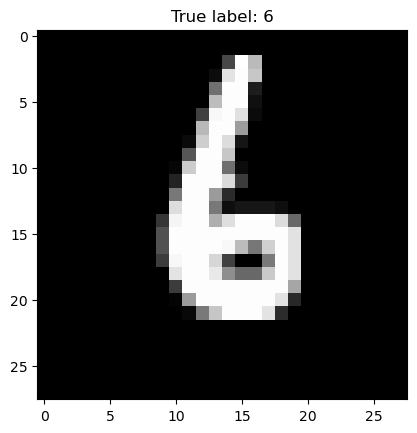

Predicted label: 6


C:\Users\saniy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\saniy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Tuned Model Accuracy on 25% dataset: 0.94
Tuned Model Accuracy on full dataset: 0.96


C:\Users\saniy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [8]:
# KNN with default parameter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('train.csv')

imputer = SimpleImputer(strategy='mean')

X = imputer.fit_transform(data.iloc[:, 1:])  # Pixel values (handling NaNs)
Y = data.iloc[:, 0].values  # Digit labels 

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}") 
# Reduce the dataset size to 25% for faster training and testing
X_small, _, Y_small, _ = train_test_split(X, Y, test_size=0.75, random_state=9)                                                                                                                              # Splitting the reduced dataset into training and testing sets
X_train_small, X_test_small, Y_train_small, Y_test_small = train_test_split(X_small, Y_small, test_size=0.2, random_state=9)
print(f"Training set shape: {X_train_small.shape}")
print(f"Testing set shape: {X_test_small.shape}")  

# Using 'kd_tree' algorithm for faster neighbor search
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_small, Y_train_small)                                                                                                                                                                              # Select a specific test sample to visualize
sample_index = 101  # Feel free to change this to another index                                                                                                                                              # Reshape the selected test sample and display it as an image
plt.imshow(X_test_small[sample_index].reshape(28, 28), cmap='gray')
plt.title(f"True label: {Y_test_small[sample_index]}")
plt.show()
# Predict the digit for the selected test sample
predicted_label = knn_classifier.predict(X_test_small[sample_index].reshape(1, -1))
# Print the predicted digit
print(f"Predicted label: {predicted_label[0]}")
# Make predictions on the entire reduced test set
Y_pred_small = knn_classifier.predict(X_test_small)

# Calculate the accuracy of the model on the reduced dataset
accuracy_small = accuracy_score(Y_test_small, Y_pred_small)


# Print the accuracy
print(f"Tuned Model Accuracy on 25% dataset: {accuracy_small:.2f}")
# Splitting the full dataset for final evaluation (optional)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

# Train the same KNN classifier on the full dataset
knn_classifier.fit(X_train, Y_train)

# Make predictions on the full test set
Y_pred_full = knn_classifier.predict(X_test)

# Calculate the accuracy of the model on the full dataset
accuracy_full = accuracy_score(Y_test, Y_pred_full)

# Print the accuracy for the full dataset
print(f"Tuned Model Accuracy on full dataset: {accuracy_full:.2f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
Tuned Model Accuracy on 25% dataset: 0.94
Tuned Model Accuracy on full dataset: 0.97


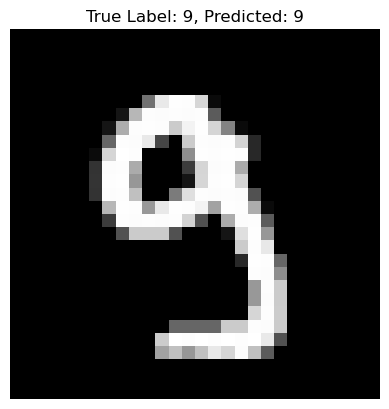

In [9]:
# Random Search optimization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Load dataset
data = pd.read_csv('train.csv')

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data.iloc[:, 1:])  # Pixel values (handling NaNs)
Y = data.iloc[:, 0].values  # Digit labels

# Use 25% of the data for hyperparameter tuning
X_small, _, Y_small, _ = train_test_split(X, Y, test_size=0.75, random_state=9)

# Splitting the smaller dataset into training and testing sets (for tuning only)
X_train_small, X_test_small, Y_train_small, Y_test_small = train_test_split(X_small, Y_small, test_size=0.2, random_state=9)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_neighbors': randint(3, 10),  # Randomly choose n_neighbors between 3 and 10
    'weights': ['uniform', 'distance'],  # Test both uniform and distance weights
    'p': randint(1, 3)  # Randomly choose p (1 for Manhattan, 2 for Euclidean)
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform randomized search with cross-validation (5 folds) on 25% data
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=9)

# Fit the model on the smaller training data
random_search.fit(X_train_small, Y_train_small)

# Print the best hyperparameters found
print(f"Best hyperparameters: {random_search.best_params_}")

# Use the best model for prediction on the small test set
best_knn = random_search.best_estimator_
Y_pred_small = best_knn.predict(X_test_small)

# Calculate the accuracy of the tuned model on the small test set
accuracy_small = accuracy_score(Y_test_small, Y_pred_small)
print(f"Tuned Model Accuracy on 25% dataset: {accuracy_small:.2f}")

# Once the best hyperparameters are found, train the model on the full dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

# Train the best model on the full dataset
best_knn_full = KNeighborsClassifier(**random_search.best_params_)
best_knn_full.fit(X_train, Y_train)

# Make predictions on the full test set
Y_pred_full = best_knn_full.predict(X_test)

# Calculate the accuracy on the full dataset
accuracy_full = accuracy_score(Y_test, Y_pred_full)
print(f"Tuned Model Accuracy on full dataset: {accuracy_full:.2f}")

# --- Code for predicting and displaying an image ---
def display_digit(index, X_test, Y_test, Y_pred_full):
    """ Function to display a digit and its predicted label """
    img = X_test[index].reshape(28, 28)  # Assuming images are 28x28 pixels
    plt.imshow(img, cmap='gray')
    plt.title(f"True Label: {Y_test[index]}, Predicted: {Y_pred_full[index]}")
    plt.axis('off')
    plt.show()

# Choose a random index from the test set
random_index = np.random.randint(0, len(X_test))

# Display the image with the true and predicted label
display_digit(random_index, X_test, Y_test, Y_pred_full)

Accuracy: 0.97


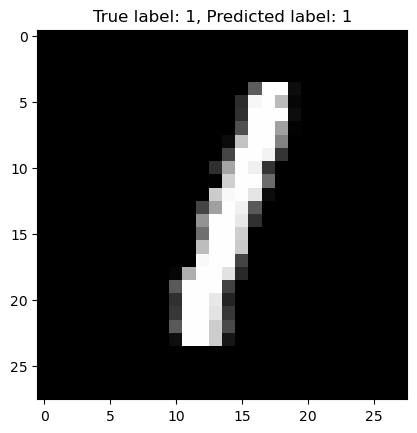

In [11]:
# SVM model

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset (Make sure the path to the CSV file is correct)
data = pd.read_csv('train.csv')

# Features and labels
X = data.iloc[:, 1:].values  # Pixel values (all columns except the first)
Y = data.iloc[:, 0].values   # Digit labels (first column)

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

# Initialize the Support Vector Classifier (SVC)
svm = SVC()

# Train the model
svm.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = svm.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display an example test image with its predicted label
sample_index = 1000
plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
plt.title(f"True label: {Y_test[sample_index]}, Predicted label: {Y_pred[sample_index]}")
plt.show()

C:\Users\saniy\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8377 - loss: 0.4832 - val_accuracy: 0.9768 - val_loss: 0.0739
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9798 - loss: 0.0677 - val_accuracy: 0.9833 - val_loss: 0.0520
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9858 - loss: 0.0433 - val_accuracy: 0.9843 - val_loss: 0.0479
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.9840 - val_loss: 0.0450
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9933 - loss: 0.0225 - val_accuracy: 0.9888 - val_loss: 0.0359
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9874 - loss: 0.0427
Test accuracy: 0.9888


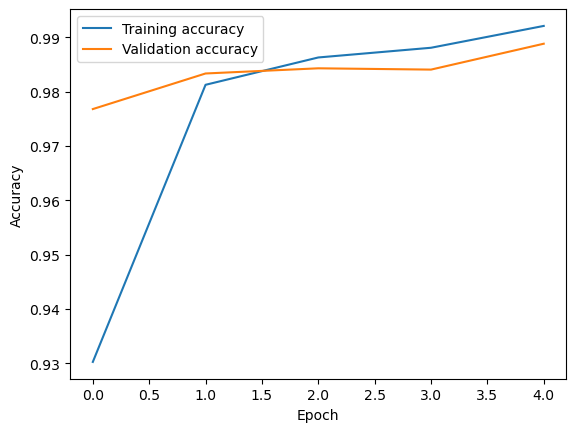

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


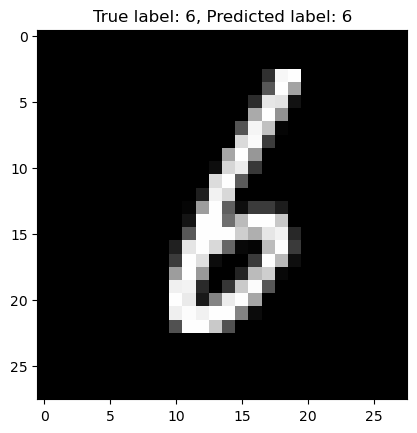

In [10]:
# Digit Recognition using CNN 

# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 2: Load dataset from CSV file (Use the provided path for train.csv)
train_path = 'train.csv'
test_path = 'test.csv'

# Read the training dataset
train_data = pd.read_csv(train_path)

# Step 3: Preprocessing - split data into features (X) and labels (Y)
X = train_data.iloc[:, 1:].values / 255.0  # Normalize pixel values (0-255 -> 0-1)
Y = train_data.iloc[:, 0].values           # Labels (digits)

# Reshape X to be suitable for CNN (28x28 pixels, 1 color channel for grayscale)
X = X.reshape(-1, 28, 28, 1)

# Step 4: Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 5: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output neurons (for digits 0-9)
])

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Step 9: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 10: Visualize sample predictions
sample_index = 101
plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
plt.title(f"True label: {Y_test[sample_index]}, Predicted label: {model.predict(X_test[sample_index].reshape(1, 28, 28, 1)).argmax()}")
plt.show()

Epoch 1/5


C:\Users\saniy\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8513 - loss: 0.4642 - val_accuracy: 0.9748 - val_loss: 0.0814
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9799 - loss: 0.0665 - val_accuracy: 0.9832 - val_loss: 0.0507
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9881 - loss: 0.0401 - val_accuracy: 0.9844 - val_loss: 0.0447
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9889 - val_loss: 0.0343
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.9885 - val_loss: 0.0343
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9873 - loss: 0.0421
Validation accuracy: 0.9885
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
Predictions saved to digit_recognizer_predictions.csv


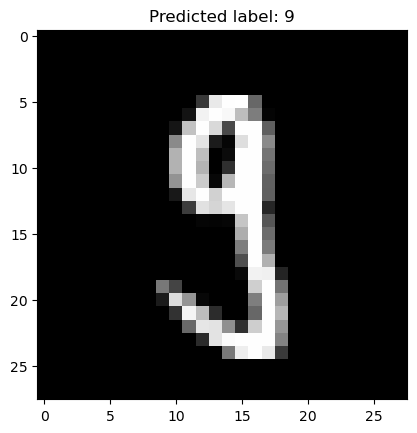

In [12]:
# Digit Recognition using CNN

# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load dataset from CSV file (Use the provided path for train.csv and test.csv)
train_path = 'train.csv'
test_path = 'test.csv'

# Read the training dataset
train_data = pd.read_csv(train_path)

# Read the test dataset (which does not have labels)
test_data = pd.read_csv(test_path)

# Step 3: Preprocessing - split training data into features (X) and labels (Y)
X_train_full = train_data.iloc[:, 1:].values / 255.0  # Normalize pixel values (0-255 -> 0-1)
Y_train_full = train_data.iloc[:, 0].values           # Labels (digits)

# Reshape X to be suitable for CNN (28x28 pixels, 1 color channel for grayscale)
X_train_full = X_train_full.reshape(-1, 28, 28, 1)

# Step 4: Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full, test_size=0.2, random_state=42)

# Step 5: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output neurons (for digits 0-9)
])

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, Y_train, epochs=5, validation_data=(X_val, Y_val))

# Step 8: Evaluate the model on validation set
val_loss, val_acc = model.evaluate(X_val, Y_val)
print(f"Validation accuracy: {val_acc:.4f}")

# Step 9: Preprocess the test data (normalize and reshape for the CNN)
X_test = test_data.values / 255.0  # Normalize pixel values
X_test = X_test.reshape(-1, 28, 28, 1)  # Reshape for CNN input (28x28 grayscale)

# Step 10: Make predictions on the test dataset
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)

# Step 11: Create a CSV file with Image ID and corresponding predicted label
image_ids = np.arange(1, len(predicted_labels) + 1)  # Generate image IDs starting from 1
output_df = pd.DataFrame({'ImageId': image_ids, 'Label': predicted_labels})

# Save to CSV file
output_df.to_csv('digit_recognizer_predictions.csv', index=False)
print("Predictions saved to digit_recognizer_predictions.csv")

# Optional: Visualize a sample prediction
sample_index = 101
plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted label: {predicted_labels[sample_index]}")
plt.show()
